# Neural network based tumor classification and detection

## Import statements for all the libraries used

In [1]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers, optimizers
from keras.utils import image_dataset_from_directory, load_img, img_to_array, to_categorical
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import random

## Getting the weights for Inception V3

In [42]:
model_conv = InceptionV3(weights='imagenet', input_shape=(250, 250, 3), include_top=False)

## Model summary of Inception V3

In [43]:
model_conv.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 124, 124, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 124, 124, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

## Freezing the model and making all the layers untrainable

In [44]:
model_conv.trainable = False

## Adding fully connected classification bloack which has flatten, dense and output layer

In [45]:
model = models.Sequential()
model.add(model_conv)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model summary of the retrained model

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 73728)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               18874624  
                                                                 
 dense_9 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 40,678,436
Trainable params: 18,875,652
Non-trainable params: 21,802,784
_________________________________________________________________


## Loading the test dataset while changing the images to 250 by 250 pixels

In [47]:
train_dataset = image_dataset_from_directory("dataset/train", image_size=(250, 250), batch_size=32)
validation_dataset = image_dataset_from_directory("dataset/validation", image_size=(250, 250), batch_size=32)

Found 4512 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.


## Training the model

In [48]:
callbacks = [ keras.callbacks.ModelCheckpoint(
                filepath="brain_tumor_classification",
                save_best_only=False,
                monitor="val_loss"
            )]
        
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=100, callbacks=callbacks)
model.save("brain_tumor_classification.h5", save_format='h5')

Epoch 1/100
141/141 [==============================] - ETA: 0s - loss: 66.4006 - accuracy: 0.6877

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 94s 520ms/step - loss: 66.4006 - accuracy: 0.6877 - val_loss: 6.1334 - val_accuracy: 0.7892
Epoch 2/100
141/141 [==============================] - ETA: 0s - loss: 3.4799 - accuracy: 0.8455

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 68s 478ms/step - loss: 3.4799 - accuracy: 0.8455 - val_loss: 3.7719 - val_accuracy: 0.8342
Epoch 3/100
141/141 [==============================] - ETA: 0s - loss: 2.5304 - accuracy: 0.8743

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 469ms/step - loss: 2.5304 - accuracy: 0.8743 - val_loss: 5.5399 - val_accuracy: 0.7800
Epoch 4/100
141/141 [==============================] - ETA: 0s - loss: 1.4282 - accuracy: 0.9122

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 462ms/step - loss: 1.4282 - accuracy: 0.9122 - val_loss: 4.1452 - val_accuracy: 0.8392
Epoch 5/100
141/141 [==============================] - ETA: 0s - loss: 0.9946 - accuracy: 0.9293

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 485ms/step - loss: 0.9946 - accuracy: 0.9293 - val_loss: 3.4295 - val_accuracy: 0.8917
Epoch 6/100
141/141 [==============================] - ETA: 0s - loss: 1.2463 - accuracy: 0.9233

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 466ms/step - loss: 1.2463 - accuracy: 0.9233 - val_loss: 5.5128 - val_accuracy: 0.7742
Epoch 7/100
141/141 [==============================] - ETA: 0s - loss: 0.9464 - accuracy: 0.9344

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 62s 435ms/step - loss: 0.9464 - accuracy: 0.9344 - val_loss: 5.1583 - val_accuracy: 0.8433
Epoch 8/100
141/141 [==============================] - ETA: 0s - loss: 1.1673 - accuracy: 0.9395

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 451ms/step - loss: 1.1673 - accuracy: 0.9395 - val_loss: 7.1143 - val_accuracy: 0.8317
Epoch 9/100
141/141 [==============================] - ETA: 0s - loss: 0.6531 - accuracy: 0.9530

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 447ms/step - loss: 0.6531 - accuracy: 0.9530 - val_loss: 4.8503 - val_accuracy: 0.8292
Epoch 10/100
141/141 [==============================] - ETA: 0s - loss: 1.2440 - accuracy: 0.9209

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 466ms/step - loss: 1.2440 - accuracy: 0.9209 - val_loss: 2.8546 - val_accuracy: 0.8583
Epoch 11/100
141/141 [==============================] - ETA: 0s - loss: 0.4090 - accuracy: 0.9601

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 459ms/step - loss: 0.4090 - accuracy: 0.9601 - val_loss: 1.9697 - val_accuracy: 0.9100
Epoch 12/100
141/141 [==============================] - ETA: 0s - loss: 0.2548 - accuracy: 0.9743

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 487ms/step - loss: 0.2548 - accuracy: 0.9743 - val_loss: 3.5656 - val_accuracy: 0.8367
Epoch 13/100
141/141 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.9599

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 470ms/step - loss: 0.4725 - accuracy: 0.9599 - val_loss: 2.3564 - val_accuracy: 0.8858
Epoch 14/100
141/141 [==============================] - ETA: 0s - loss: 0.2328 - accuracy: 0.9770

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 490ms/step - loss: 0.2328 - accuracy: 0.9770 - val_loss: 3.2446 - val_accuracy: 0.8767
Epoch 15/100
141/141 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.9727

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 70s 497ms/step - loss: 0.2403 - accuracy: 0.9727 - val_loss: 2.3862 - val_accuracy: 0.8925
Epoch 16/100
141/141 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9763

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 62s 436ms/step - loss: 0.1309 - accuracy: 0.9763 - val_loss: 2.7526 - val_accuracy: 0.8958
Epoch 17/100
141/141 [==============================] - ETA: 0s - loss: 0.3518 - accuracy: 0.9716

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 457ms/step - loss: 0.3518 - accuracy: 0.9716 - val_loss: 3.0148 - val_accuracy: 0.9050
Epoch 18/100
141/141 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.9863

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 476ms/step - loss: 0.0818 - accuracy: 0.9863 - val_loss: 2.2075 - val_accuracy: 0.9158
Epoch 19/100
141/141 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.9727

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 61s 430ms/step - loss: 0.2719 - accuracy: 0.9727 - val_loss: 2.3780 - val_accuracy: 0.9042
Epoch 20/100
141/141 [==============================] - ETA: 0s - loss: 0.1923 - accuracy: 0.9752

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 474ms/step - loss: 0.1923 - accuracy: 0.9752 - val_loss: 2.5453 - val_accuracy: 0.9142
Epoch 21/100
141/141 [==============================] - ETA: 0s - loss: 0.2602 - accuracy: 0.9809

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 460ms/step - loss: 0.2602 - accuracy: 0.9809 - val_loss: 2.7318 - val_accuracy: 0.8917
Epoch 22/100
141/141 [==============================] - ETA: 0s - loss: 0.5428 - accuracy: 0.9506

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 71s 500ms/step - loss: 0.5428 - accuracy: 0.9506 - val_loss: 2.6243 - val_accuracy: 0.8992
Epoch 23/100
141/141 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.9783

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 70s 492ms/step - loss: 0.2574 - accuracy: 0.9783 - val_loss: 4.6561 - val_accuracy: 0.8458
Epoch 24/100
141/141 [==============================] - ETA: 0s - loss: 0.3747 - accuracy: 0.9641

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 62s 435ms/step - loss: 0.3747 - accuracy: 0.9641 - val_loss: 1.9735 - val_accuracy: 0.9192
Epoch 25/100
141/141 [==============================] - ETA: 0s - loss: 0.0949 - accuracy: 0.9860

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 70s 496ms/step - loss: 0.0949 - accuracy: 0.9860 - val_loss: 2.3962 - val_accuracy: 0.9117
Epoch 26/100
141/141 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9883

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 457ms/step - loss: 0.0937 - accuracy: 0.9883 - val_loss: 2.4399 - val_accuracy: 0.9058
Epoch 27/100
141/141 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9911

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 469ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 2.1190 - val_accuracy: 0.9208
Epoch 28/100
141/141 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9976

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 468ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 2.1213 - val_accuracy: 0.9225
Epoch 29/100
141/141 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9929

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 453ms/step - loss: 0.0309 - accuracy: 0.9929 - val_loss: 1.9493 - val_accuracy: 0.9133
Epoch 30/100
141/141 [==============================] - ETA: 0s - loss: 0.8086 - accuracy: 0.9355

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 448ms/step - loss: 0.8086 - accuracy: 0.9355 - val_loss: 3.2016 - val_accuracy: 0.8825
Epoch 31/100
141/141 [==============================] - ETA: 0s - loss: 0.1635 - accuracy: 0.9781

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 460ms/step - loss: 0.1635 - accuracy: 0.9781 - val_loss: 2.6025 - val_accuracy: 0.8733
Epoch 32/100
141/141 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9925

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 470ms/step - loss: 0.0514 - accuracy: 0.9925 - val_loss: 2.6243 - val_accuracy: 0.9058
Epoch 33/100
141/141 [==============================] - ETA: 0s - loss: 0.2504 - accuracy: 0.9741

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 466ms/step - loss: 0.2504 - accuracy: 0.9741 - val_loss: 4.4638 - val_accuracy: 0.8567
Epoch 34/100
141/141 [==============================] - ETA: 0s - loss: 0.1455 - accuracy: 0.9781

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 463ms/step - loss: 0.1455 - accuracy: 0.9781 - val_loss: 2.2444 - val_accuracy: 0.9000
Epoch 35/100
141/141 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9916

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 62s 439ms/step - loss: 0.0384 - accuracy: 0.9916 - val_loss: 1.9715 - val_accuracy: 0.9250
Epoch 36/100
141/141 [==============================] - ETA: 0s - loss: 6.8095e-04 - accuracy: 0.9998

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 438ms/step - loss: 6.8095e-04 - accuracy: 0.9998 - val_loss: 1.8889 - val_accuracy: 0.9258
Epoch 37/100
141/141 [==============================] - ETA: 0s - loss: 5.0530e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 474ms/step - loss: 5.0530e-05 - accuracy: 1.0000 - val_loss: 1.8913 - val_accuracy: 0.9250
Epoch 38/100
141/141 [==============================] - ETA: 0s - loss: 4.2867e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 68s 478ms/step - loss: 4.2867e-05 - accuracy: 1.0000 - val_loss: 1.8899 - val_accuracy: 0.9250
Epoch 39/100
141/141 [==============================] - ETA: 0s - loss: 3.5421e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 479ms/step - loss: 3.5421e-05 - accuracy: 1.0000 - val_loss: 1.8909 - val_accuracy: 0.9242
Epoch 40/100
141/141 [==============================] - ETA: 0s - loss: 3.1576e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 455ms/step - loss: 3.1576e-05 - accuracy: 1.0000 - val_loss: 1.8914 - val_accuracy: 0.9242
Epoch 41/100
141/141 [==============================] - ETA: 0s - loss: 2.8546e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 445ms/step - loss: 2.8546e-05 - accuracy: 1.0000 - val_loss: 1.8920 - val_accuracy: 0.9250
Epoch 42/100
141/141 [==============================] - ETA: 0s - loss: 2.6309e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 475ms/step - loss: 2.6309e-05 - accuracy: 1.0000 - val_loss: 1.8925 - val_accuracy: 0.9250
Epoch 43/100
141/141 [==============================] - ETA: 0s - loss: 2.4141e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 454ms/step - loss: 2.4141e-05 - accuracy: 1.0000 - val_loss: 1.8937 - val_accuracy: 0.9250
Epoch 44/100
141/141 [==============================] - ETA: 0s - loss: 2.3137e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 68s 478ms/step - loss: 2.3137e-05 - accuracy: 1.0000 - val_loss: 1.8933 - val_accuracy: 0.9250
Epoch 45/100
141/141 [==============================] - ETA: 0s - loss: 2.1686e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 73s 517ms/step - loss: 2.1686e-05 - accuracy: 1.0000 - val_loss: 1.8933 - val_accuracy: 0.9242
Epoch 46/100
141/141 [==============================] - ETA: 0s - loss: 2.0845e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 453ms/step - loss: 2.0845e-05 - accuracy: 1.0000 - val_loss: 1.8931 - val_accuracy: 0.9242
Epoch 47/100
141/141 [==============================] - ETA: 0s - loss: 1.9454e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 475ms/step - loss: 1.9454e-05 - accuracy: 1.0000 - val_loss: 1.8934 - val_accuracy: 0.9242
Epoch 48/100
141/141 [==============================] - ETA: 0s - loss: 1.8361e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 446ms/step - loss: 1.8361e-05 - accuracy: 1.0000 - val_loss: 1.8936 - val_accuracy: 0.9242
Epoch 49/100
141/141 [==============================] - ETA: 0s - loss: 1.7518e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 462ms/step - loss: 1.7518e-05 - accuracy: 1.0000 - val_loss: 1.8938 - val_accuracy: 0.9242
Epoch 50/100
141/141 [==============================] - ETA: 0s - loss: 1.6741e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 461ms/step - loss: 1.6741e-05 - accuracy: 1.0000 - val_loss: 1.8941 - val_accuracy: 0.9242
Epoch 51/100
141/141 [==============================] - ETA: 0s - loss: 1.5945e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 61s 431ms/step - loss: 1.5945e-05 - accuracy: 1.0000 - val_loss: 1.8940 - val_accuracy: 0.9242
Epoch 52/100
141/141 [==============================] - ETA: 0s - loss: 1.5112e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 461ms/step - loss: 1.5112e-05 - accuracy: 1.0000 - val_loss: 1.8950 - val_accuracy: 0.9242
Epoch 53/100
141/141 [==============================] - ETA: 0s - loss: 1.4701e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 62s 434ms/step - loss: 1.4701e-05 - accuracy: 1.0000 - val_loss: 1.8950 - val_accuracy: 0.9233
Epoch 54/100
141/141 [==============================] - ETA: 0s - loss: 1.4086e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 467ms/step - loss: 1.4086e-05 - accuracy: 1.0000 - val_loss: 1.8956 - val_accuracy: 0.9233
Epoch 55/100
141/141 [==============================] - ETA: 0s - loss: 1.3612e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 487ms/step - loss: 1.3612e-05 - accuracy: 1.0000 - val_loss: 1.8961 - val_accuracy: 0.9233
Epoch 56/100
141/141 [==============================] - ETA: 0s - loss: 1.2719e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 68s 478ms/step - loss: 1.2719e-05 - accuracy: 1.0000 - val_loss: 1.8963 - val_accuracy: 0.9233
Epoch 57/100
141/141 [==============================] - ETA: 0s - loss: 1.2420e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 473ms/step - loss: 1.2420e-05 - accuracy: 1.0000 - val_loss: 1.8977 - val_accuracy: 0.9233
Epoch 58/100
141/141 [==============================] - ETA: 0s - loss: 1.1820e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 464ms/step - loss: 1.1820e-05 - accuracy: 1.0000 - val_loss: 1.8974 - val_accuracy: 0.9242
Epoch 59/100
141/141 [==============================] - ETA: 0s - loss: 1.1258e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 469ms/step - loss: 1.1258e-05 - accuracy: 1.0000 - val_loss: 1.8982 - val_accuracy: 0.9242
Epoch 60/100
141/141 [==============================] - ETA: 0s - loss: 1.0935e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 456ms/step - loss: 1.0935e-05 - accuracy: 1.0000 - val_loss: 1.8989 - val_accuracy: 0.9242
Epoch 61/100
141/141 [==============================] - ETA: 0s - loss: 1.0277e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 75s 530ms/step - loss: 1.0277e-05 - accuracy: 1.0000 - val_loss: 1.8991 - val_accuracy: 0.9233
Epoch 62/100
141/141 [==============================] - ETA: 0s - loss: 9.9441e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 456ms/step - loss: 9.9441e-06 - accuracy: 1.0000 - val_loss: 1.9003 - val_accuracy: 0.9233
Epoch 63/100
141/141 [==============================] - ETA: 0s - loss: 9.3687e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 453ms/step - loss: 9.3687e-06 - accuracy: 1.0000 - val_loss: 1.9012 - val_accuracy: 0.9233
Epoch 64/100
141/141 [==============================] - ETA: 0s - loss: 9.0632e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 484ms/step - loss: 9.0632e-06 - accuracy: 1.0000 - val_loss: 1.9025 - val_accuracy: 0.9233
Epoch 65/100
141/141 [==============================] - ETA: 0s - loss: 8.5966e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 455ms/step - loss: 8.5966e-06 - accuracy: 1.0000 - val_loss: 1.9035 - val_accuracy: 0.9233
Epoch 66/100
141/141 [==============================] - ETA: 0s - loss: 8.2753e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 468ms/step - loss: 8.2753e-06 - accuracy: 1.0000 - val_loss: 1.9043 - val_accuracy: 0.9233
Epoch 67/100
141/141 [==============================] - ETA: 0s - loss: 8.1746e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 448ms/step - loss: 8.1746e-06 - accuracy: 1.0000 - val_loss: 1.9047 - val_accuracy: 0.9233
Epoch 68/100
141/141 [==============================] - ETA: 0s - loss: 7.4602e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 450ms/step - loss: 7.4602e-06 - accuracy: 1.0000 - val_loss: 1.9054 - val_accuracy: 0.9233
Epoch 69/100
141/141 [==============================] - ETA: 0s - loss: 7.1941e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 463ms/step - loss: 7.1941e-06 - accuracy: 1.0000 - val_loss: 1.9074 - val_accuracy: 0.9233
Epoch 70/100
141/141 [==============================] - ETA: 0s - loss: 6.8305e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 448ms/step - loss: 6.8305e-06 - accuracy: 1.0000 - val_loss: 1.9074 - val_accuracy: 0.9233
Epoch 71/100
141/141 [==============================] - ETA: 0s - loss: 6.5617e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 68s 477ms/step - loss: 6.5617e-06 - accuracy: 1.0000 - val_loss: 1.9077 - val_accuracy: 0.9233
Epoch 72/100
141/141 [==============================] - ETA: 0s - loss: 6.1815e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 458ms/step - loss: 6.1815e-06 - accuracy: 1.0000 - val_loss: 1.9092 - val_accuracy: 0.9233
Epoch 73/100
141/141 [==============================] - ETA: 0s - loss: 5.9643e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 470ms/step - loss: 5.9643e-06 - accuracy: 1.0000 - val_loss: 1.9098 - val_accuracy: 0.9233
Epoch 74/100
141/141 [==============================] - ETA: 0s - loss: 5.6932e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 451ms/step - loss: 5.6932e-06 - accuracy: 1.0000 - val_loss: 1.9108 - val_accuracy: 0.9242
Epoch 75/100
141/141 [==============================] - ETA: 0s - loss: 5.3105e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 458ms/step - loss: 5.3105e-06 - accuracy: 1.0000 - val_loss: 1.9119 - val_accuracy: 0.9242
Epoch 76/100
141/141 [==============================] - ETA: 0s - loss: 5.1764e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 458ms/step - loss: 5.1764e-06 - accuracy: 1.0000 - val_loss: 1.9132 - val_accuracy: 0.9242
Epoch 77/100
141/141 [==============================] - ETA: 0s - loss: 4.8801e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 462ms/step - loss: 4.8801e-06 - accuracy: 1.0000 - val_loss: 1.9139 - val_accuracy: 0.9242
Epoch 78/100
141/141 [==============================] - ETA: 0s - loss: 4.5424e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 469ms/step - loss: 4.5424e-06 - accuracy: 1.0000 - val_loss: 1.9156 - val_accuracy: 0.9233
Epoch 79/100
141/141 [==============================] - ETA: 0s - loss: 4.2846e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 446ms/step - loss: 4.2846e-06 - accuracy: 1.0000 - val_loss: 1.9170 - val_accuracy: 0.9233
Epoch 80/100
141/141 [==============================] - ETA: 0s - loss: 4.0916e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 476ms/step - loss: 4.0916e-06 - accuracy: 1.0000 - val_loss: 1.9183 - val_accuracy: 0.9233
Epoch 81/100
141/141 [==============================] - ETA: 0s - loss: 3.8552e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 470ms/step - loss: 3.8552e-06 - accuracy: 1.0000 - val_loss: 1.9194 - val_accuracy: 0.9233
Epoch 82/100
141/141 [==============================] - ETA: 0s - loss: 3.6656e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 61s 430ms/step - loss: 3.6656e-06 - accuracy: 1.0000 - val_loss: 1.9193 - val_accuracy: 0.9233
Epoch 83/100
141/141 [==============================] - ETA: 0s - loss: 3.4472e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 460ms/step - loss: 3.4472e-06 - accuracy: 1.0000 - val_loss: 1.9214 - val_accuracy: 0.9233
Epoch 84/100
141/141 [==============================] - ETA: 0s - loss: 3.2929e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 464ms/step - loss: 3.2929e-06 - accuracy: 1.0000 - val_loss: 1.9230 - val_accuracy: 0.9233
Epoch 85/100
141/141 [==============================] - ETA: 0s - loss: 3.0695e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 486ms/step - loss: 3.0695e-06 - accuracy: 1.0000 - val_loss: 1.9243 - val_accuracy: 0.9233
Epoch 86/100
141/141 [==============================] - ETA: 0s - loss: 2.9499e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 462ms/step - loss: 2.9499e-06 - accuracy: 1.0000 - val_loss: 1.9249 - val_accuracy: 0.9233
Epoch 87/100
141/141 [==============================] - ETA: 0s - loss: 2.7588e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 63s 446ms/step - loss: 2.7588e-06 - accuracy: 1.0000 - val_loss: 1.9249 - val_accuracy: 0.9233
Epoch 88/100
141/141 [==============================] - ETA: 0s - loss: 2.5924e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 456ms/step - loss: 2.5924e-06 - accuracy: 1.0000 - val_loss: 1.9270 - val_accuracy: 0.9225
Epoch 89/100
141/141 [==============================] - ETA: 0s - loss: 2.4899e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 487ms/step - loss: 2.4899e-06 - accuracy: 1.0000 - val_loss: 1.9275 - val_accuracy: 0.9242
Epoch 90/100
141/141 [==============================] - ETA: 0s - loss: 2.3351e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 61s 432ms/step - loss: 2.3351e-06 - accuracy: 1.0000 - val_loss: 1.9294 - val_accuracy: 0.9233
Epoch 91/100
141/141 [==============================] - ETA: 0s - loss: 2.1868e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 72s 509ms/step - loss: 2.1868e-06 - accuracy: 1.0000 - val_loss: 1.9306 - val_accuracy: 0.9233
Epoch 92/100
141/141 [==============================] - ETA: 0s - loss: 2.1140e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 468ms/step - loss: 2.1140e-06 - accuracy: 1.0000 - val_loss: 1.9318 - val_accuracy: 0.9242
Epoch 93/100
141/141 [==============================] - ETA: 0s - loss: 1.9757e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 466ms/step - loss: 1.9757e-06 - accuracy: 1.0000 - val_loss: 1.9320 - val_accuracy: 0.9242
Epoch 94/100
141/141 [==============================] - ETA: 0s - loss: 1.8666e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 67s 476ms/step - loss: 1.8666e-06 - accuracy: 1.0000 - val_loss: 1.9332 - val_accuracy: 0.9233
Epoch 95/100
141/141 [==============================] - ETA: 0s - loss: 1.7561e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 64s 454ms/step - loss: 1.7561e-06 - accuracy: 1.0000 - val_loss: 1.9345 - val_accuracy: 0.9242
Epoch 96/100
141/141 [==============================] - ETA: 0s - loss: 1.6369e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 484ms/step - loss: 1.6369e-06 - accuracy: 1.0000 - val_loss: 1.9359 - val_accuracy: 0.9242
Epoch 97/100
141/141 [==============================] - ETA: 0s - loss: 1.5342e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 455ms/step - loss: 1.5342e-06 - accuracy: 1.0000 - val_loss: 1.9371 - val_accuracy: 0.9233
Epoch 98/100
141/141 [==============================] - ETA: 0s - loss: 1.4562e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 66s 464ms/step - loss: 1.4562e-06 - accuracy: 1.0000 - val_loss: 1.9389 - val_accuracy: 0.9242
Epoch 99/100
141/141 [==============================] - ETA: 0s - loss: 1.3769e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 65s 460ms/step - loss: 1.3769e-06 - accuracy: 1.0000 - val_loss: 1.9414 - val_accuracy: 0.9233
Epoch 100/100
141/141 [==============================] - ETA: 0s - loss: 1.3137e-06 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_tumor_classification\assets


INFO:tensorflow:Assets written to: brain_tumor_classification\assets


141/141 [==============================] - 69s 487ms/step - loss: 1.3137e-06 - accuracy: 1.0000 - val_loss: 1.9410 - val_accuracy: 0.9233


## Plotting training accuracy vs validation accuracy for the model

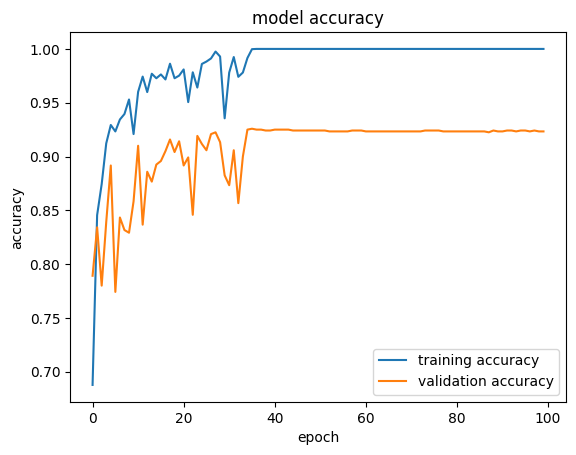

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

## Plotting training loss vs validation loss for the model

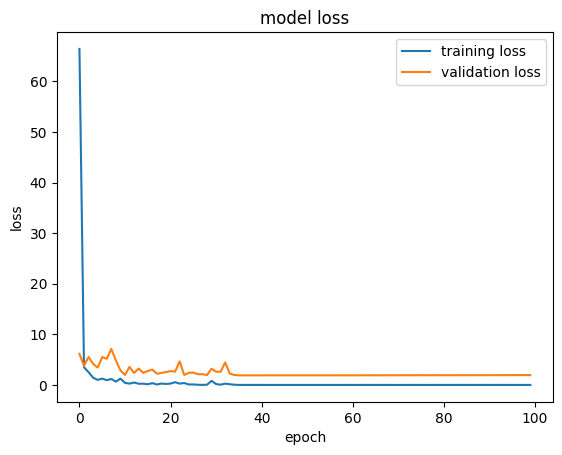

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

## Loading the test dataset and evaluating the model

In [2]:
test_dataset = image_dataset_from_directory("dataset/test", image_size=(250, 250), batch_size=32)
model = load_model("brain_tumor_classification.h5")

# Evaluate the model on the test dataset
evaluation_result = model.evaluate(test_dataset)

# Display the evaluation metrics
print("Loss:", evaluation_result[0])
print("Accuracy:", evaluation_result[1]) 

Found 1311 files belonging to 4 classes.
41/41 [==============================] - 37s 293ms/step - loss: 1.2742 - accuracy: 0.9321
Loss: 1.2741565704345703
Accuracy: 0.9321128726005554


## Testing the model on 10 random images from Glioma category

In [3]:
path = "dataset/test/glioma/"
all_files = os.listdir(path)

image_files = [file for file in all_files if file.endswith(('.jpg'))]

selected_files = random.sample(image_files, 10)

for i, file in enumerate(selected_files):
    image = load_img(path+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    print(f"Filename: {file}")
    prediction_label = np.argmax(model.predict(img_array))
    if prediction_label == 0:
        print("Given image is of a Glioma")
        print(f"Prediction: {prediction[0][0]}\n")
    elif prediction_label == 1:
        print("Given image is of a Meningioma")
        print(f"Prediction: {prediction[0][1]}\n")
    elif prediction_label == 2:
        print("Given image is of a No tumor")
        print(f"Prediction: {prediction[0][2]}\n")
    else:
        print("Given image is of a Pituitary")
        print(f"Prediction: {prediction[0][3]}\n")

1/1 [==============================] - 4s 4s/step
Filename: Te-gl_0020.jpg
1/1 [==============================] - 0s 36ms/step
Given image is of a Glioma
Prediction: 0.9991859793663025

1/1 [==============================] - 0s 31ms/step
Filename: Te-gl_0098.jpg
1/1 [==============================] - 0s 31ms/step
Given image is of a Glioma
Prediction: 1.0

1/1 [==============================] - 0s 32ms/step
Filename: Te-gl_0165.jpg
1/1 [==============================] - 0s 43ms/step
Given image is of a Glioma
Prediction: 1.0

1/1 [==============================] - 0s 36ms/step
Filename: Te-gl_0265.jpg
1/1 [==============================] - 0s 39ms/step
Given image is of a Meningioma
Prediction: 0.9991565942764282

1/1 [==============================] - 0s 44ms/step
Filename: Te-gl_0105.jpg
1/1 [==============================] - 0s 47ms/step
Given image is of a No tumor
Prediction: 0.9997398257255554

1/1 [==============================] - 0s 38ms/step
Filename: Te-gl_0177.jpg
1/1 [====

## Testing the model on 10 random images from Meningioma category

In [5]:
path = "dataset/test/meningioma/"
all_files = os.listdir(path)

image_files = [file for file in all_files if file.endswith(('.jpg'))]

selected_files = random.sample(image_files, 10)

for i, file in enumerate(selected_files):
    image = load_img(path+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    print(f"Filename: {file}")
    prediction_label = np.argmax(model.predict(img_array))
    if prediction_label == 0:
        print("Given image is of a Glioma")
        print(f"Prediction: {prediction[0][0]}\n")
    elif prediction_label == 1:
        print("Given image is of a Meningioma")
        print(f"Prediction: {prediction[0][1]}\n")
    elif prediction_label == 2:
        print("Given image is of a No tumor")
        print(f"Prediction: {prediction[0][2]}\n")
    else:
        print("Given image is of a Pituitary")
        print(f"Prediction: {prediction[0][3]}\n")

1/1 [==============================] - 0s 41ms/step
Filename: Te-me_0255.jpg
1/1 [==============================] - 0s 35ms/step
Given image is of a Meningioma
Prediction: 0.999491810798645

1/1 [==============================] - 0s 67ms/step
Filename: Te-me_0062.jpg
1/1 [==============================] - 0s 37ms/step
Given image is of a Meningioma
Prediction: 1.0

1/1 [==============================] - 0s 76ms/step
Filename: Te-me_0185.jpg
1/1 [==============================] - 0s 36ms/step
Given image is of a Meningioma
Prediction: 1.0

1/1 [==============================] - 0s 41ms/step
Filename: Te-me_0254.jpg
1/1 [==============================] - 0s 40ms/step
Given image is of a Meningioma
Prediction: 0.99695885181427

1/1 [==============================] - 0s 53ms/step
Filename: Te-me_0124.jpg
1/1 [==============================] - 0s 31ms/step
Given image is of a Meningioma
Prediction: 0.9999997615814209

1/1 [==============================] - 0s 71ms/step
Filename: Te-me_0067.

## Testing the model on 10 random images from No tumor category

In [6]:
path = "dataset/test/notumor/"
all_files = os.listdir(path)

image_files = [file for file in all_files if file.endswith(('.jpg'))]

selected_files = random.sample(image_files, 10)

for i, file in enumerate(selected_files):
    image = load_img(path+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    print(f"Filename: {file}")
    #prediction_label = None
    prediction_label = np.argmax(model.predict(img_array))
    if prediction_label == 0:
        print("Given image is of a Glioma")
        print(f"Prediction: {prediction[0][0]}\n")
    elif prediction_label == 1:
        print("Given image is of a Meningioma")
        print(f"Prediction: {prediction[0][1]}\n")
    elif prediction_label == 2:
        print("Given image is of a No tumor")
        print(f"Prediction: {prediction[0][2]}\n")
    else:
        print("Given image is of a Pituitary")
        print(f"Prediction: {prediction[0][3]}\n")

1/1 [==============================] - 0s 25ms/step
Filename: Te-no_0082.jpg
1/1 [==============================] - 0s 53ms/step
Given image is of a No tumor
Prediction: 1.0

1/1 [==============================] - 0s 50ms/step
Filename: Te-no_0400.jpg
1/1 [==============================] - 0s 46ms/step
Given image is of a No tumor
Prediction: 1.0

1/1 [==============================] - 0s 41ms/step
Filename: Te-no_0085.jpg
1/1 [==============================] - 0s 39ms/step
Given image is of a No tumor
Prediction: 1.0

1/1 [==============================] - 0s 44ms/step
Filename: Te-no_0112.jpg
1/1 [==============================] - 0s 33ms/step
Given image is of a No tumor
Prediction: 1.0

1/1 [==============================] - 0s 33ms/step
Filename: Te-no_0099.jpg
1/1 [==============================] - 0s 31ms/step
Given image is of a No tumor
Prediction: 1.0

1/1 [==============================] - 0s 46ms/step
Filename: Te-no_0078.jpg
1/1 [==============================] - 0s 42ms/s

## Testing the model on 10 random images from Pituitary category

In [7]:
path = "dataset/test/pituitary/"
all_files = os.listdir(path)

image_files = [file for file in all_files if file.endswith(('.jpg'))]

selected_files = random.sample(image_files, 10)

for i, file in enumerate(selected_files):
    image = load_img(path+file,target_size=(250,250))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    print(f"Filename: {file}")
    #prediction_label = None
    prediction_label = np.argmax(model.predict(img_array))
    if prediction_label == 0:
        print("Given image is of a Glioma")
        print(f"Prediction: {prediction[0][0]}\n")
    elif prediction_label == 1:
        print("Given image is of a Meningioma")
        print(f"Prediction: {prediction[0][1]}\n")
    elif prediction_label == 2:
        print("Given image is of a No tumor")
        print(f"Prediction: {prediction[0][2]}\n")
    else:
        print("Given image is of a Pituitary")
        print(f"Prediction: {prediction[0][3]}\n")

1/1 [==============================] - 0s 32ms/step
Filename: Te-pi_0051.jpg
1/1 [==============================] - 0s 43ms/step
Given image is of a Pituitary
Prediction: 1.0

1/1 [==============================] - 0s 35ms/step
Filename: Te-pi_0038.jpg
1/1 [==============================] - 0s 36ms/step
Given image is of a Pituitary
Prediction: 1.0

1/1 [==============================] - 0s 35ms/step
Filename: Te-pi_0077.jpg
1/1 [==============================] - 0s 30ms/step
Given image is of a Pituitary
Prediction: 1.0

1/1 [==============================] - 0s 34ms/step
Filename: Te-pi_0260.jpg
1/1 [==============================] - 0s 32ms/step
Given image is of a Pituitary
Prediction: 1.0

1/1 [==============================] - 0s 31ms/step
Filename: Te-pi_0214.jpg
1/1 [==============================] - 0s 189ms/step
Given image is of a Pituitary
Prediction: 1.0

1/1 [==============================] - 0s 215ms/step
Filename: Te-pi_0096.jpg
1/1 [==============================] - 0s

In [8]:
test_dataset = image_dataset_from_directory("dataset/test", image_size=(250, 250), batch_size=32)
# Generate y_train by mapping class names to integers and then converting to categorical
test_labels = []
predicted_labels = []
for images, labels in test_dataset:
    for image, label in zip(images,labels):
        test_labels.append(label.numpy())

        img_array = img_to_array(image)
        img_array = np.expand_dims(img_array, axis=0)
        prediction_label = np.argmax(model.predict(img_array))
        predicted_labels.append(prediction_label)


Found 1311 files belonging to 4 classes.
1/1 [==============================] - 0s 52ms/step


## Plotting the classification report

In [9]:
from sklearn.metrics import classification_report

target_names = ["glioma","meningioma","notumor","pituitary"]
print(classification_report(test_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

      glioma       0.92      0.86      0.89       300
  meningioma       0.86      0.88      0.87       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.96      0.97      0.96       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.93      0.93      0.93      1311



## Plotting the confusion matrix

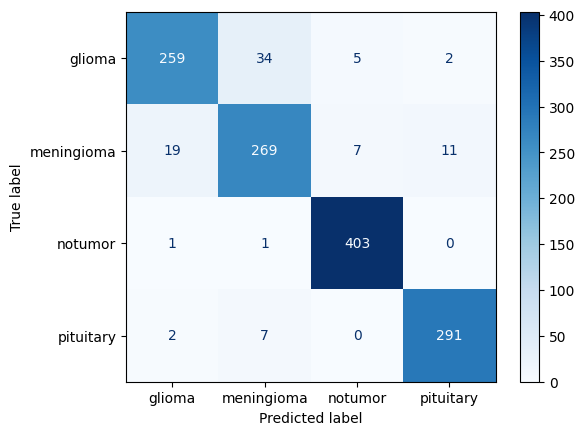

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["glioma","meningioma","notumor","pituitary"])
disp = disp.plot(cmap=plt.cm.Blues)
plt.show()